In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics as stat

Load and read data

In [37]:
data = pd.read_csv("F:/AI/Supervised Learning/diabetes_data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
y = data.Outcome.values#expected output
x_data = data.drop(["Outcome"],axis=1) #input #axis = 1 means column
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Feature scaling for x_data

In [39]:
x = (x_data - np.mean(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.126762,0.136208,0.023726,0.146096,-0.094326,0.023956,0.066236,0.279319
1,-0.167356,-0.180375,-0.025455,0.085490,-0.094326,-0.080366,-0.051612,-0.037348
2,0.244409,0.312088,-0.041848,-0.207439,-0.094326,-0.129547,0.085450,-0.020681
3,-0.167356,-0.160274,-0.025455,0.024884,0.016785,-0.058012,-0.130178,-0.204015
4,-0.226180,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.004015


Train-test split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

x_train.shape#(columns, rows)

(8, 614)


Parameter Initialize and Sigmoid Function

In [41]:
#%% Parameter initialize and sigmoid function

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_hat = 1 / (1+np.exp(-z))
    return y_hat

In [42]:
def forward_backward_propagation(w,b,x_train,y_train):
    #cost function
    z = np.dot(w.T,x_train) + b
    y_hat = sigmoid(z)
    loss = y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat)
    cost = np.sum(loss)*(-1/x_train.shape[1])

    #gradient 
    D_w = (np.dot(x_train,((y_hat-y_train).T)))/x_train.shape[1]
    D_b = np.sum(y_hat-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": D_w,"derivative_bias": D_b}
    
    return cost,gradients

Updating parameters (after every iteration)

In [43]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)

        #Update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
    # we update(learn) parameters weights and bias

    parameters = {"weight" : w, "bias" : b}
    plt.plot(index,cost_list2)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters, gradients, cost_list
    

Making prediction

In [44]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


Logistic Regression

In [45]:
def logistic_regression(x_train,y_train, x_test, y_test, learning_rate, num_iterations):
    #initialize
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction - y_test)) * 100))

    

Cost after iteration 0: 0.691892
Cost after iteration 10: 0.560341
Cost after iteration 20: 0.527752
Cost after iteration 30: 0.511025
Cost after iteration 40: 0.500781
Cost after iteration 50: 0.493823
Cost after iteration 60: 0.488788
Cost after iteration 70: 0.484990
Cost after iteration 80: 0.482041
Cost after iteration 90: 0.479703
Cost after iteration 100: 0.477819
Cost after iteration 110: 0.476282
Cost after iteration 120: 0.475016
Cost after iteration 130: 0.473964
Cost after iteration 140: 0.473084
Cost after iteration 150: 0.472344
Cost after iteration 160: 0.471718
Cost after iteration 170: 0.471187
Cost after iteration 180: 0.470735
Cost after iteration 190: 0.470348


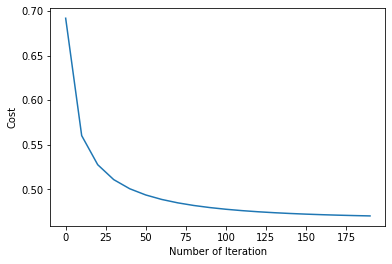

test accuracy: 75.97402597402598 %


In [56]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 5, num_iterations = 200)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print(f"Test Accuracy {lr.score(x_test.T,y_test.T)*100} %")

Test Accuracy 76.62337662337663 %
